In [1]:
import numpy as np
import tensorflow as tf
import keras
import cv2
from keras.layers import MaxPool2D,Conv2D,UpSampling2D,Input,Dropout, MaxPooling2D, Flatten, Dense
from keras.models import Sequential
from keras.preprocessing.image import img_to_array
import os
from tqdm import tqdm
import re
import matplotlib.pyplot as plt

from skimage import color

#img = color.rgb2gray(io.imread('image.png'))

Primero importamos los datos de la librería de datasets de keras y comprobamos que los datos tengan la forma que queremos

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

170498071/170498071 [==============================] - 6s 0us/step


Vamos a mostrar distintas imagenes del dataset tanto a color como en una escala de grises

In [ ]:
# defining function to plot images pair
def plot_images(color,grayscale):
    plt.figure(figsize=(15,15))
    plt.subplot(1,3,1)
    plt.title('Color Image', color = 'green', fontsize = 20)
    plt.imshow(color)
    plt.subplot(1,3,2)
    plt.title('Grayscale Image ', color = 'black', fontsize = 20)
    plt.imshow(grayscale, cmap='gray')

    plt.show()

Las salidas tienen la siguiente correlacción:

0 	airplane

1 	automobile

2 	bird

3 	cat

4 	deer

5 	dog

6 	frog

7 	horse

8 	ship

9 	truck

Funcion para convertir las imagenes a escala de grises usaremos lo siguiente:


```
color.rgb2gray( <image> )
```



(32, 32)


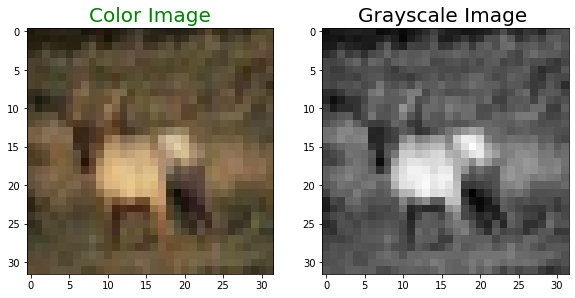

(32, 32)


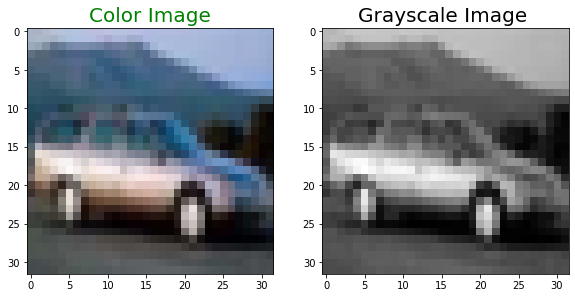

(32, 32)


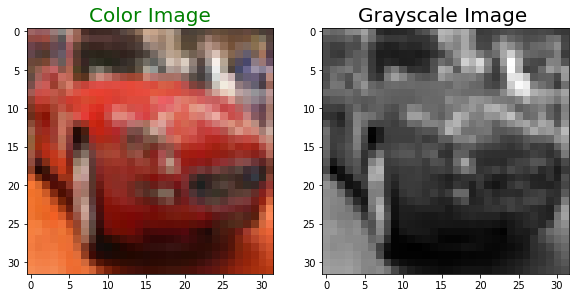

In [ ]:
for i in range(3,6):
  plot_images(x_train[i],color.rgb2gray(x_train[i]))

## Enunciado de la práctica 1

Para esta práctica hemos creido necesario que se debe poner en práctica todo lo impartido hasta la fecha, es decir, no solo las arquitecturas impartidad sino tambien las diferentes tipologías de redes mostrada hasta el momento.

Para ello, mediante el dataset anterior queremos implementar un modelo capaz de frente a una entrada de imagenes en blanco y negro, sea capaz de colorearlas. De esta manera se establecen los siguiente puntos:


1.   Implementar la arquitectura mediante redes MLP
2.   Implementar la arquitectura mediante redes Convolucionales
3.   (Opcional) Probar diferentes arquitecturas CNN que puedan mejorar lo resultados.



Lo primero será hacer el procesado de las imágenes.

Para ello, escalaremos las imagenes a grises, y trataremos los valores de salida.

In [3]:
x_train_g=color.rgb2gray(x_train)
X_test_g=color.rgb2gray(x_test)

In [4]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [5]:
y_train = tf.one_hot(y_train.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)

In [ ]:
y_train

<tf.Tensor: shape=(50000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)>

Como podemos observar, ahora tenemos una matriz de ceros y unos en los que cada columna representa a cada una de las posibles salidas anteriormente mencionadas.


1. Implementar la arquitectura mediante redes MLP

Implementaremos una arquitectura de capas densas.

Para ello, lo primero será crear una capa Flatten para que en vez de recibir un archivo de 32x32 obtengamos uno de 1024 elementos.

Después crearemos distintas capas densas con la función de activación relu y la capa de salida será una capa densa con 10 neuronas de salida que corresponderán a las diez clases que hay en el dataset. Usamos la función de activación softmax ya que es la que se usa en clasificación multiclase debido a que convierte las salidas en probabilidades que sumen todas uno.

Como es un modelo de clasificador multiclase usaremos el optimizador adam y la función de pérdida binary crossentropy

In [6]:
def model_MLP():
  model = keras.Sequential()
  model.add(Flatten(input_shape=(32,32,1)))
  model.add(Dense(2048, activation='relu'))
  model.add(Dense(2048, activation='relu'))
  model.add(Dense(512, activation='relu'))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(10, activation='softmax'))


  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model

model=model_MLP()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 2048)              2099200   
                                                                 
 dense_1 (Dense)             (None, 2048)              4196352   
                                                                 
 dense_2 (Dense)             (None, 512)               1049088   
                                                                 
 dense_3 (Dense)             (None, 128)               65664     
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 7411594 (28.27 MB)
Trainable params: 74115

In [7]:
history = model.fit(x_train_g, y_train,batch_size=32, epochs=10, validation_split=0.2, validation_steps=50)

Epoch 1/10
1250/1250 [==============================] - 15s 6ms/step - loss: 0.3013 - accuracy: 0.2448 - val_loss: 0.2872 - val_accuracy: 0.2975
Epoch 2/10
1250/1250 [==============================] - 10s 8ms/step - loss: 0.2784 - accuracy: 0.3200 - val_loss: 0.2820 - val_accuracy: 0.3144
Epoch 3/10
1250/1250 [==============================] - 9s 7ms/step - loss: 0.2711 - accuracy: 0.3437 - val_loss: 0.2706 - val_accuracy: 0.3506
Epoch 4/10
1250/1250 [==============================] - 8s 6ms/step - loss: 0.2658 - accuracy: 0.3617 - val_loss: 0.2714 - val_accuracy: 0.3325
Epoch 5/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.2615 - accuracy: 0.3767 - val_loss: 0.2630 - val_accuracy: 0.3631
Epoch 6/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.2579 - accuracy: 0.3846 - val_loss: 0.2634 - val_accuracy: 0.3663
Epoch 7/10
1250/1250 [==============================] - 6s 5ms/step - loss: 0.2537 - accuracy: 0.3994 - val_loss: 0.2596 - val_accurac

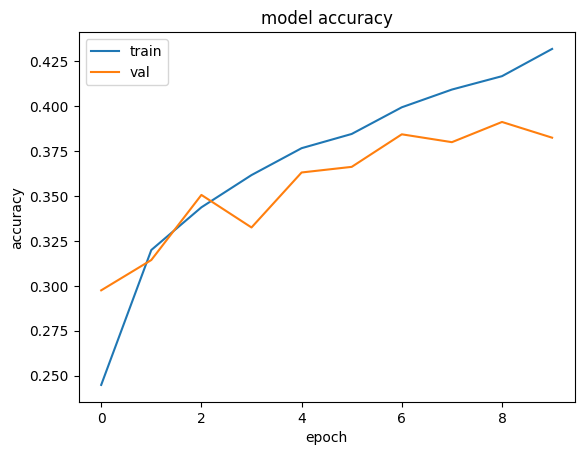

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

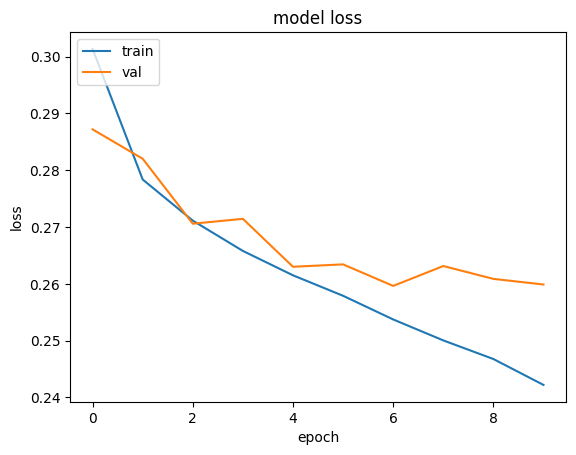

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Después de entrenarlo durante 10 épocas, vemos que la precisión es muy baja, esto es debido a que para funcionar, coge imagenes y las transforma de una matriz a una lista lo que hace que no pueda interpretar bien correlacciones entre pixeles contiguos.
Para mejorar esto, utilizaremos las redes convolucionales.

2. Implementar la arquitectura mediante redes Convolucionales

El modelo tendrá distintos tipos de capas, convolucionales, MaxPooling, densas.

En las capas convolucionales determinaremos los filtros, el temaño del kernel, strides, padding y la función de activación.

El tamaño de kernel es el tamaño de la submatriz que irá mapeando la matriz que se le ha enviado para disminuir el tamaño de la misma cogiendo las características más importantes de la misma.

Strides hace referencia a la longitud de movimiento de cada submatriz. Si ponemos 1, la siguiente submatriz será moviendo cada posición una vez.

Padding crea un borde de ceros a la matriz para que podamos obtener todos los datos y no perdamos los laterales de la imagen.

Después de usar las capas convolucionales tenemos que usar una capa MaxPooling para hacer más pequeño el tamaño de la matriz. Podemos concatenar como mucho 3 capas convolucionales antes de usar la capa MaxPooling.

Usamos Dropout para seleccionar neuronas aleatorias que no se van a entrenar, esto lo hacemos para intentar evitar el overfitting.

Finalmente usamos una capa Flatten para aplanar la matriz y poder pasarle los parámetros a las capas densas finales.

In [ ]:
def modelo_CNN():
  # creamos el modelo
  model = Sequential()
  model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu',input_shape=(32, 32,1)))
  model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
  model.add(MaxPool2D(pool_size=(2,2),strides=2))
  model.add(Dropout(0.2))

  model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
  model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2),strides=2))
  model.add(Dropout(0.2))

  model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
  model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2),strides=2))
  model.add(Dropout(0.2))

  model.add(Flatten())
  model.add(Dense(512,kernel_initializer='normal', activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))

  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [ ]:
modelg=modelo_CNN()
modelg.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 32, 32, 32)        320       
                                                                 
 conv2d_16 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_18 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

In [ ]:
history = modelg.fit(x_train_g, y_train,batch_size=32, epochs=10, validation_split=0.2, validation_steps=50)

Epoch 1/10
1250/1250 [==============================] - 11s 6ms/step - loss: 0.2718 - accuracy: 0.3300 - val_loss: 0.2183 - val_accuracy: 0.4831
Epoch 2/10
1250/1250 [==============================] - 8s 6ms/step - loss: 0.1983 - accuracy: 0.5588 - val_loss: 0.1678 - val_accuracy: 0.6344
Epoch 3/10
1250/1250 [==============================] - 8s 6ms/step - loss: 0.1652 - accuracy: 0.6479 - val_loss: 0.1538 - val_accuracy: 0.6744
Epoch 4/10
1250/1250 [==============================] - 8s 6ms/step - loss: 0.1474 - accuracy: 0.6886 - val_loss: 0.1309 - val_accuracy: 0.7138
Epoch 5/10
1250/1250 [==============================] - 8s 7ms/step - loss: 0.1348 - accuracy: 0.7186 - val_loss: 0.1265 - val_accuracy: 0.7275
Epoch 6/10
1250/1250 [==============================] - 8s 6ms/step - loss: 0.1262 - accuracy: 0.7379 - val_loss: 0.1188 - val_accuracy: 0.7456
Epoch 7/10
1250/1250 [==============================] - 8s 6ms/step - loss: 0.1193 - accuracy: 0.7559 - val_loss: 0.1211 - val_accuracy

Podemos ver que la precisión de este modelo es mayor al primero y esto es debido a que en las primeras capas tratamos las imagenes como una matriz lo que hace que no pierda detalles relaccionados entre sí.

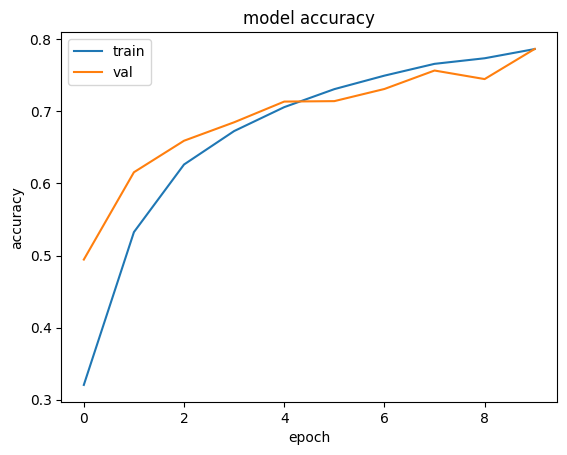

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Con este histograma podemos ver que la precisión de entrenamiento y validación llevan una tendencia parecida lo que nos hace ver que no hay signos de overfitting.

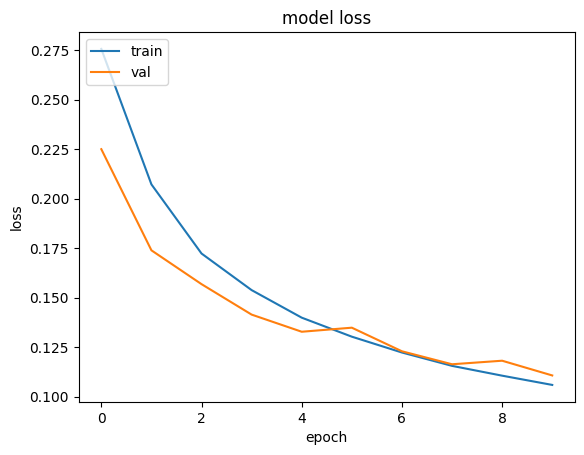

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

3. (Opcional) Probar diferentes arquitecturas CNN que puedan mejorar lo resultados.

Para probar otras diferentes arquitecturas usaremos una red neuronal ya entrenada con imagenes y le añadiremos nosotros la parte de las capas densas del final.

Vamos a usar la red VGG16.

Como la red neuronal por defecto recibe datos con los tres canales de colores trataremos los datos dividiendolos entre 255, que es el máximo que puede haber en cada variable, para obtener valores entre 0 y 1.

In [ ]:
x_train=x_train/255.0
x_test=x_test/255.0

En la red neuronal pondremos que se puedan entrenar todos los pesos aunque se puede seleccionar las capas que queremos que se entrene. En ese caso elegiriamos la capas del último bloque. La velocidad de entrenamiento vendrá dado en relación con las capas que tenga que entrenar.

In [10]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
conv_base.trainable=True

58889256/58889256 [==============================] - 3s 0us/step


In [11]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

Creamos nuestro modelo cogiendo de base la red preentrenada y siguiendo la estructura del anterior modelo convolucional.

In [12]:
def modelo_mix():
  model = Sequential()
  model.add(conv_base)
  model.add(Flatten())
  model.add(Dense(512,kernel_initializer='normal', activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
  return model

In [13]:
model2=modelo_mix()
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 512)               262656    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 10)                5130      
                                                                 
Total params: 14982474 (57.15 MB)
Trainable params: 14982474 (57.15 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model2.fit(x_train, y_train,batch_size=32, epochs=10, validation_split=0.2, validation_steps=50)

Epoch 1/10
1250/1250 [==============================] - 41s 27ms/step - loss: 0.2662 - acc: 0.3054 - val_loss: 0.2418 - val_acc: 0.3913
Epoch 2/10
1250/1250 [==============================] - 32s 26ms/step - loss: 0.1890 - acc: 0.5677 - val_loss: 0.1564 - val_acc: 0.6550
Epoch 3/10
1250/1250 [==============================] - 33s 27ms/step - loss: 0.1450 - acc: 0.6906 - val_loss: 0.1542 - val_acc: 0.6862
Epoch 4/10
1250/1250 [==============================] - 33s 26ms/step - loss: 0.1236 - acc: 0.7485 - val_loss: 0.1318 - val_acc: 0.7319
Epoch 5/10
1250/1250 [==============================] - 33s 26ms/step - loss: 0.1064 - acc: 0.7859 - val_loss: 0.1152 - val_acc: 0.7600
Epoch 6/10
1250/1250 [==============================] - 33s 26ms/step - loss: 0.0943 - acc: 0.8136 - val_loss: 0.1238 - val_acc: 0.7644
Epoch 7/10
1250/1250 [==============================] - 33s 26ms/step - loss: 0.0857 - acc: 0.8329 - val_loss: 0.1123 - val_acc: 0.7831
Epoch 8/10
1250/1250 [==========================

Como podemos observar tiene un acierto parecido al anterior aunque ligeramente mejor.

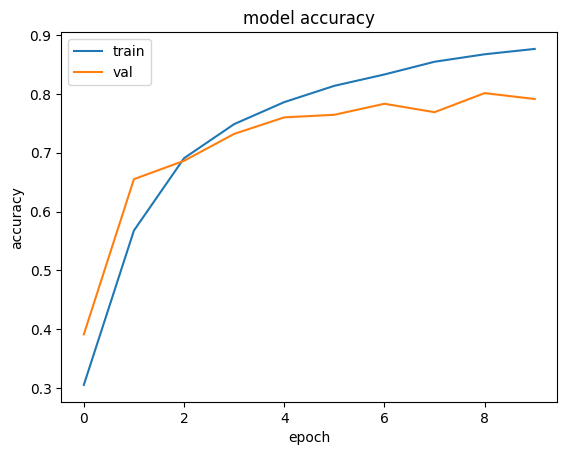

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

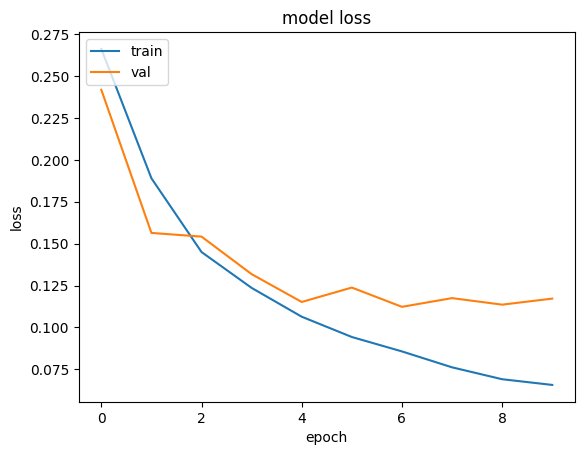

In [3]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()